In [51]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt

In [53]:
plt.style.use('fivethirtyeight')

In [4]:
from spacy import displacy

In [10]:
download_manager_reqs = pd.read_csv('./requirement/download_manager_reqs.csv')
antivirus_reqs = pd.read_csv('./requirement/antivirus_reqs.csv')
compression_reqs = pd.read_csv('./requirement/compression_reqs.csv')
file_sharing_reqs = pd.read_csv('./requirement/file_sharing_reqs.csv')
news_reqs = pd.read_csv('./requirement/news_reqs.csv')
vpn_reqs = pd.read_csv('./requirement/vpn_reqs.csv')
web_browser_reqs = pd.read_csv('./requirement/web_browser_reqs.csv')

In [27]:
reqs_df = pd.concat([download_manager_reqs, antivirus_reqs, compression_reqs, file_sharing_reqs, news_reqs, vpn_reqs, web_browser_reqs])
reqs_df.reset_index(inplace=True)

In [28]:
# how many requirements in each domain
reqs_df.groupby('domain').count()

,index,app,requirement,url
domain,,,,
Antivirus,1814,1814,1814,1814
Compression Tool,1327,1327,1327,1327
Download Manager,2775,2775,2775,2775
File Sharing,1848,1848,1848,1848
News,872,872,872,872
VPN,287,287,287,287
Web Browser,1756,1756,1756,1756


In [46]:
# Add new column accounting for requirement length
reqs_df['req_length'] = reqs_df['requirement'].apply(lambda r: len(r.split()))

In [49]:
# average requirement length (counted as number of words)
reqs_df['req_length'].mean()

11.786777788182414

In [50]:
reqs_df.groupby('domain')['req_length'].mean()

domain
Antivirus           15.478501
Compression Tool    11.359457
Download Manager     9.400721
File Sharing        11.600108
News                11.391055
VPN                 11.902439
Web Browser         12.440774
Name: req_length, dtype: float64

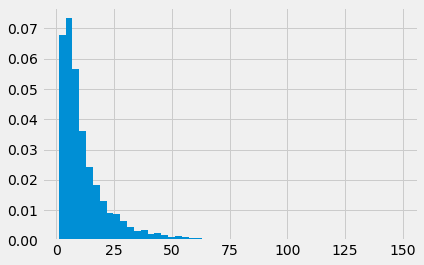

In [65]:
_ = plt.hist(reqs_df['req_length'], bins=50, density=True)

In [101]:
# Create tidy requirement dataframe, where each row contains a token
d = {'req_id': [], 'token': []}
for index, row in reqs_df.iterrows():
    doc = nlp(row['requirement'])
    d['req_id'].extend([index] * len(doc))
    d['token'].extend([token for token in doc])

tidy_reqs_df = pd.DataFrame(d)

In [111]:
tidy_reqs_df.head(5)

,req_id,token
0,0,Download
1,0,accelerator
2,1,Browser
3,1,integration
4,1,:


In [ ]:
# eliminate non-alphabetical tokens & Remove stop words
tidy_reqs_df_filtered = tidy_reqs_df[tidy_reqs_df['token'].apply(lambda token: token.is_alpha and token.is_stop == False)]


# create new column storing token value for later processing
# create new columns for part-of-speech taggings
tidy_reqs_df_filtered['token_str'] = tidy_reqs_df_filtered['token'].apply(lambda token: token.text)
tidy_reqs_df_filtered['pos'] = tidy_reqs_df_filtered['token'].apply(lambda token: token.pos_)
tidy_reqs_df_filtered['tag'] = tidy_reqs_df_filtered['token'].apply(lambda token: token.tag_)
tidy_reqs_df_filtered['lemma'] = tidy_reqs_df_filtered['token'].apply(lambda token: token.lemma_.lower())
tidy_reqs_df_filtered['norm'] = tidy_reqs_df_filtered['token'].apply(lambda token: token.norm_)
tidy_reqs_df_filtered['dep'] = tidy_reqs_df_filtered['token'].apply(lambda token: token.dep_)

In [156]:
tidy_reqs_df_filtered.head()

,req_id,token,token_str,pos,tag,lemma,norm,dep
0,0,Download,Download,PROPN,NNP,download,download,compound
1,0,accelerator,accelerator,NOUN,NN,accelerator,accelerator,ROOT
2,1,Browser,Browser,NOUN,NN,browser,browser,compound
3,1,integration,integration,NOUN,NN,integration,integration,ROOT
5,1,IE,IE,PROPN,NNP,ie,ie,appos


In [157]:
tidy_reqs_df_filtered['norm'].value_counts()

files         1339
download       995
file           819
support        655
web            543
              ... 
xxencode         1
strengthen       1
scrap            1
coffee           1
composed         1
Name: norm, Length: 7327, dtype: int64

,req_id,token,token_str
13,2,for,for
21,2,and,and
27,3,to,to
29,3,up,up
32,4,or,or
...,...,...,...
148252,10677,into,into
148253,10677,your,your
148257,10678,To,To
148259,10678,it,it


In [77]:
for token in nlp(reqs_df.loc[100]['requirement']):
    print(token.text, type(token))

Support <class 'spacy.tokens.token.Token'>
drag <class 'spacy.tokens.token.Token'>
batch <class 'spacy.tokens.token.Token'>
download <class 'spacy.tokens.token.Token'>
linking <class 'spacy.tokens.token.Token'>


In [3]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Autonomous cars shift insurance liability toward manufacturers")
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Autonomous amod cars NOUN []
cars nsubj shift VERB [Autonomous]
shift ROOT shift VERB [cars, liability]
insurance compound liability NOUN []
liability dobj shift VERB [insurance, toward]
toward prep liability NOUN [manufacturers]
manufacturers pobj toward ADP []


In [6]:
displacy.render(doc, style="dep")

In [8]:
doc.is_sentenced

True